In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
data=pd.read_csv('liver_cirrhosis.csv')
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


# Data preprocessing 

In [22]:
data.size

475000

In [23]:
data.shape

(25000, 19)

In [26]:
data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [29]:
data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [32]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [33]:
data.tail()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [35]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [37]:
data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [38]:
data.duplicated().sum()

15361

In [39]:
data['Status'].value_counts()

Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64

In [41]:
new=data.select_dtypes(include="number").corr()
new

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.060569,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960,-0.309484
Age,-0.060569,1.000000,0.006081,-0.035932,-0.108807,0.006670,0.029575,0.011165,0.030719,-0.123611,0.042134,0.165988
Bilirubin,-0.394799,0.006081,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145,0.168006
Cholesterol,-0.123461,-0.035932,0.339106,1.000000,-0.066418,0.129223,0.116131,0.322450,0.248305,0.008835,0.006194,0.025415
Albumin,0.368851,-0.108807,-0.283105,-0.066418,1.000000,-0.179171,-0.125686,-0.162569,-0.111661,0.118662,-0.215859,-0.231631
Copper,-0.281349,0.006670,0.432199,0.129223,-0.179171,1.000000,0.200772,0.281353,0.253358,-0.074730,0.141349,0.131763
Alk_Phos,0.147792,0.029575,0.112972,0.116131,-0.125686,0.200772,1.000000,0.151769,0.129874,0.007922,0.072392,0.084407
SGOT,-0.220532,0.011165,0.368024,0.322450,-0.162569,0.281353,0.151769,1.000000,0.122173,-0.093752,0.133210,0.175301
Tryglicerides,-0.147606,0.030719,0.379776,0.248305,-0.111661,0.253358,0.129874,0.122173,1.000000,-0.020636,0.027211,0.079228
Platelets,0.115908,-0.123611,-0.095162,0.008835,0.118662,-0.074730,0.007922,-0.093752,-0.020636,1.000000,-0.156356,-0.250058


# Heatmap

<Axes: >

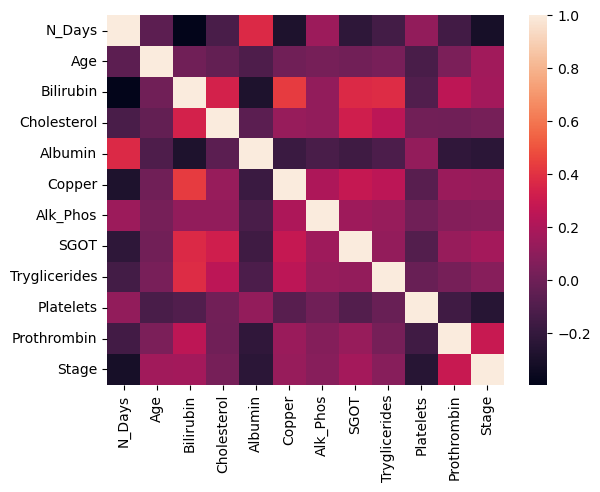

In [44]:
sns.heatmap(new)

In [45]:
newdata=data.drop_duplicates()

In [47]:
newdata.duplicated().sum()

0

In [48]:
newdata["Status"].value_counts()

Status
C     5325
D     3705
CL     609
Name: count, dtype: int64

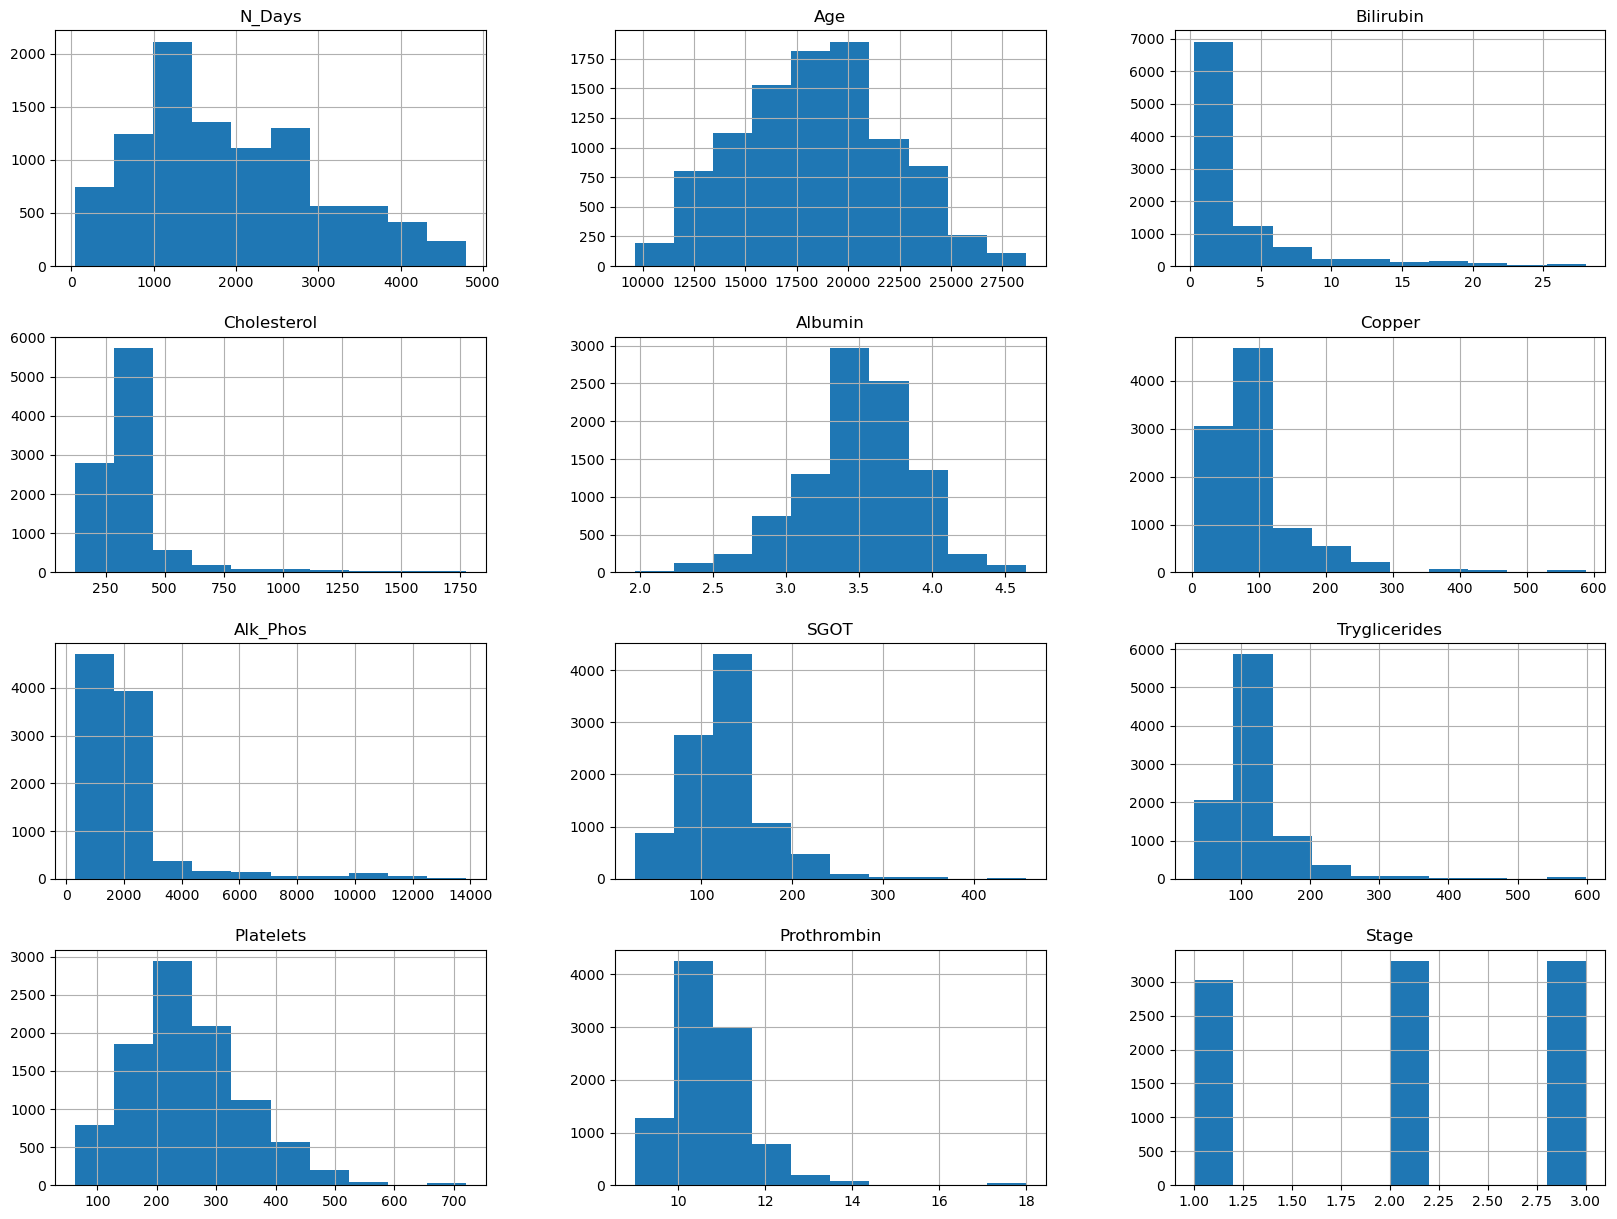

In [50]:
histplot=newdata.select_dtypes(include="number")
histplot.hist(figsize=(20,15))
plt.savefig("plt.png")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'N_Days'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Bilirubin'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'Albumin'),
  Text(5, 0, 'Copper'),
  Text(6, 0, 'Alk_Phos'),
  Text(7, 0, 'SGOT'),
  Text(8, 0, 'Tryglicerides'),
  Text(9, 0, 'Platelets'),
  Text(10, 0, 'Prothrombin'),
  Text(11, 0, 'Stage')])

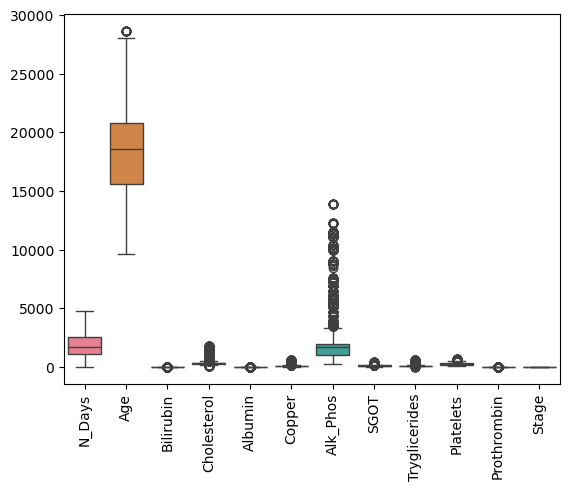

In [51]:
sns.boxplot(newdata)
plt.xticks(rotation=90)

# Capping

<Axes: >

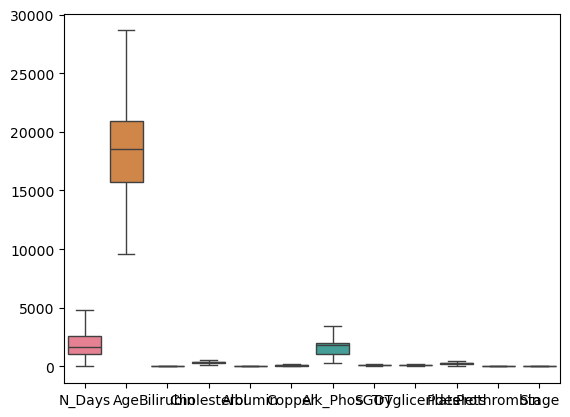

In [55]:
list=['Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
for i in list:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim =Q3+1.5*IQR
    data.loc[(data[i]>=up_lim),i]=up_lim
    data.loc[(data[i]<=low_lim),i]=low_lim
sns.boxplot(data)

# LabelEncoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()

newdata['Status']=le1.fit_transform(newdata['Status'])
newdata['Drug']=le2.fit_transform(newdata['Drug'])
newdata['Sex']=le3.fit_transform(newdata['Sex'])
newdata['Ascites']=le4.fit_transform(newdata['Ascites'])
newdata['Hepatomegaly']=le5.fit_transform(newdata['Hepatomegaly'])
newdata['Spiders']=le6.fit_transform(newdata['Spiders'])
newdata['Edema']=le7.fit_transform(newdata['Edema'])
newdata


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,0,1,17897,0,1,0,1,0,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
24971,4795,0,1,23376,0,1,0,1,0,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
24972,3358,2,0,24585,0,0,1,0,0,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
24991,4365,0,0,21324,0,0,0,0,0,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


# X,Y Separation

In [63]:
x=newdata.drop("Status",axis=1)
y=newdata["Status"]
x

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1230,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,4184,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,2090,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,1,17897,0,1,0,1,0,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
24971,4795,1,23376,0,1,0,1,0,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
24972,3358,0,24585,0,0,1,0,0,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
24991,4365,0,21324,0,0,0,0,0,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


In [65]:
y

0        0
1        0
2        0
3        2
4        2
        ..
24963    0
24971    0
24972    2
24991    0
24992    2
Name: Status, Length: 9639, dtype: int32

In [67]:
from sklearn.preprocessing import StandardScaler

# Scaling

In [69]:
sd=StandardScaler()
x_new=sd.fit_transform(x)
x_new

array([[ 0.28349281,  0.74274772,  0.0187566 , ...,  0.0231094 ,
        -0.88215519, -1.27069312],
       [-0.62271874,  0.74274772,  0.35039685, ..., -0.35292574,
         0.0940067 , -0.03599443],
       [ 2.07854151,  0.74274772, -1.78428346, ..., -0.30069864,
        -0.77369275, -0.03599443],
       ...,
       [ 1.32321282, -1.34635216,  1.6663995 , ...,  1.65259501,
         1.17863103,  1.19870426],
       [ 2.24405543, -1.34635216,  0.78355962, ..., -0.26936238,
        -0.44830546, -0.03599443],
       [-1.11285939, -1.34635216,  2.76690368, ..., -1.63771247,
         0.52785643,  1.19870426]])

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y, test_size=0.3,random_state=25)

In [73]:
y_train_adj=y_train-1
y_test_adj=y_test-1

In [74]:

model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [75]:
pred_y=model1.predict(x_test) 
pred_y

array([0, 2, 0, ..., 2, 0, 0])

In [76]:
y_test

11905    0
2849     0
20236    0
6547     2
7356     0
        ..
12836    0
549      2
10422    2
3459     2
1640     0
Name: Status, Length: 2892, dtype: int32

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
score1=accuracy_score(pred_y,y_test)
score1

0.7517289073305671

In [80]:
cm1=confusion_matrix(pred_y,y_test)
cm1

array([[1418,   92,  362],
       [   0,    1,    0],
       [ 177,   87,  755]], dtype=int64)

In [81]:
cr1=classification_report(pred_y,y_test)
print(cr1)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1872
           1       0.01      1.00      0.01         1
           2       0.68      0.74      0.71      1019

    accuracy                           0.75      2892
   macro avg       0.52      0.83      0.51      2892
weighted avg       0.81      0.75      0.78      2892



In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
model2=GradientBoostingClassifier()
model2.fit(x_train,y_train)

GradientBoostingClassifier()

In [84]:
pred_y1=model2.predict(x_test) 
pred_y1

array([0, 0, 0, ..., 2, 2, 0])

In [87]:
score2=accuracy_score(pred_y1,y_test)
score2

0.9384508990318119

In [88]:
cm2=confusion_matrix(pred_y1,y_test)
cm2

array([[1555,   32,   94],
       [   1,  136,    0],
       [  39,   12, 1023]], dtype=int64)

In [89]:
cr2=classification_report(pred_y1,y_test)
print(cr2)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1681
           1       0.76      0.99      0.86       137
           2       0.92      0.95      0.93      1074

    accuracy                           0.94      2892
   macro avg       0.88      0.96      0.91      2892
weighted avg       0.94      0.94      0.94      2892



In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
pred_y2=model3.predict(x_test)
pred_y2

array([0, 0, 0, ..., 2, 2, 0])

In [96]:
score3=accuracy_score(pred_y2,y_test)
score3

0.9491701244813278

In [97]:
cm3=confusion_matrix(pred_y2,y_test)
cm3

array([[1524,   11,   49],
       [  13,  160,    7],
       [  58,    9, 1061]], dtype=int64)

In [98]:
cr3=classification_report(pred_y2,y_test)
print(cr3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1584
           1       0.89      0.89      0.89       180
           2       0.95      0.94      0.95      1128

    accuracy                           0.95      2892
   macro avg       0.93      0.93      0.93      2892
weighted avg       0.95      0.95      0.95      2892



In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
pred_y3=model4.predict(x_test)
pred_y3

array([0, 0, 0, ..., 2, 2, 0])

In [104]:
score4=accuracy_score(pred_y3,y_test)
score4

0.9699170124481328

In [105]:
cm4=confusion_matrix(pred_y3,y_test)
cm4

array([[1569,   17,   35],
       [   0,  154,    0],
       [  26,    9, 1082]], dtype=int64)

In [107]:
cr4=classification_report(pred_y3,y_test)
print(cr4)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1621
           1       0.86      1.00      0.92       154
           2       0.97      0.97      0.97      1117

    accuracy                           0.97      2892
   macro avg       0.94      0.98      0.96      2892
weighted avg       0.97      0.97      0.97      2892



In [109]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model5=GaussianNB()
model5.fit(x_train,y_train)

GaussianNB()

In [115]:
pred_y4=model5.predict(x_test)
pred_y4

array([0, 2, 0, ..., 2, 0, 0])

In [118]:
score5=accuracy_score(pred_y4,y_test)
score5

0.6926002766251729

In [124]:
cm5=confusion_matrix(pred_y4,y_test)
cm5

array([[1408,  111,  453],
       [  56,   18,   87],
       [ 131,   51,  577]], dtype=int64)

In [129]:
cr5=classification_report(pred_y4,y_test)
print(cr5)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1972
           1       0.10      0.11      0.11       161
           2       0.52      0.76      0.62       759

    accuracy                           0.69      2892
   macro avg       0.50      0.53      0.50      2892
weighted avg       0.74      0.69      0.71      2892



In [130]:
from sklearn.svm import SVC

In [131]:
model6=SVC()
model6.fit(x_train,y_train)
model6.score(x_test,y_test)
pred_y5=model6.predict(x_test)
pred_y5

score6=accuracy_score(pred_y5,y_test)
score6


0.808091286307054

In [132]:
cm6=confusion_matrix(pred_y5,y_test)
cm6

array([[1477,   95,  282],
       [   0,   27,    2],
       [ 118,   58,  833]], dtype=int64)

In [133]:
cr6=classification_report(pred_y5,y_test)
print(cr6)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1854
           1       0.15      0.93      0.26        29
           2       0.75      0.83      0.78      1009

    accuracy                           0.81      2892
   macro avg       0.61      0.85      0.63      2892
weighted avg       0.86      0.81      0.83      2892



In [134]:
from sklearn.ensemble import AdaBoostClassifier

In [135]:
model7=AdaBoostClassifier()
model7.fit(x_train,y_train)

AdaBoostClassifier()

In [139]:
pred_y6=model7.predict(x_test)
pred_y6

score7=accuracy_score(pred_y6,y_test)
score7

0.8063623789764869

In [140]:
cm7=confusion_matrix(pred_y6,y_test)
cm7

array([[1394,   58,  233],
       [  22,   62,    8],
       [ 179,   60,  876]], dtype=int64)

In [141]:
cr7=classification_report(pred_y6,y_test)
print(cr7)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1685
           1       0.34      0.67      0.46        92
           2       0.78      0.79      0.78      1115

    accuracy                           0.81      2892
   macro avg       0.67      0.76      0.70      2892
weighted avg       0.82      0.81      0.81      2892



In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
model8=KNeighborsClassifier(n_neighbors=10)
model8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [161]:
pred_y7=model8.predict(x_test)
pred_y7

array([0, 0, 0, ..., 2, 2, 0])

In [168]:
score8=accuracy_score(pred_y7,y_test)
score8

0.7994467496542186

In [174]:
cm8=confusion_matrix(pred_y7,y_test)
cm8

array([[1495,   89,  336],
       [   9,   50,   14],
       [  91,   41,  767]], dtype=int64)

In [175]:
cr8=classification_report(pred_y7,y_test)
print(cr8)

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1920
           1       0.28      0.68      0.40        73
           2       0.69      0.85      0.76       899

    accuracy                           0.80      2892
   macro avg       0.63      0.77      0.67      2892
weighted avg       0.84      0.80      0.81      2892



In [176]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [177]:
from xgboost import XGBClassifier

In [178]:
y_train.unique()

array([2, 0, 1])

In [179]:
model9=XGBClassifier()


In [180]:
model9.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [181]:
pred_y8=model9.predict(x_test)
pred_y8

array([0, 0, 0, ..., 2, 2, 0], dtype=int64)

In [182]:
score9=accuracy_score(pred_y8,y_test)
score9

0.979253112033195

In [183]:
y_train.value_counts()

Status
0    3730
2    2588
1     429
Name: count, dtype: int64

# Data balancing 

In [186]:
from imblearn.over_sampling import SMOTE

In [188]:
over=SMOTE(random_state=2)
x_train,y_train=over.fit_resample(x_new,y)

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=.3,random_state=42)

In [190]:
modl1=LogisticRegression()
modl1.fit(x_train,y_train)

LogisticRegression()

In [191]:
pred_y=modl1.predict(x_test)
pred_y

array([0, 1, 2, ..., 2, 1, 2])

In [192]:
scores1=accuracy_score(pred_y,y_test)
scores1

0.5994158147298143

In [193]:
cm1=confusion_matrix(pred_y,y_test)
cm1

array([[1137,  352,  314],
       [ 322,  875,  409],
       [ 165,  358,  861]], dtype=int64)

In [194]:
cr1=classification_report(pred_y,y_test)
print(cr1)

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      1803
           1       0.55      0.54      0.55      1606
           2       0.54      0.62      0.58      1384

    accuracy                           0.60      4793
   macro avg       0.60      0.60      0.60      4793
weighted avg       0.61      0.60      0.60      4793



In [196]:
modl2=GradientBoostingClassifier()
modl2.fit(x_train,y_train)

GradientBoostingClassifier()

In [197]:
pred_y1=modl2.predict(x_test)
pred_y1

array([0, 0, 2, ..., 1, 0, 1])

In [198]:
scores2=accuracy_score(pred_y1,y_test)
scores2

0.9127894846651367

In [199]:
cm2=confusion_matrix(pred_y1,y_test)
cm2

array([[1486,   81,  112],
       [  53, 1465,   48],
       [  85,   39, 1424]], dtype=int64)

In [200]:
cr2=classification_report(pred_y1,y_test)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1679
           1       0.92      0.94      0.93      1566
           2       0.90      0.92      0.91      1548

    accuracy                           0.91      4793
   macro avg       0.91      0.91      0.91      4793
weighted avg       0.91      0.91      0.91      4793



In [201]:
modl3=DecisionTreeClassifier()
modl3.fit(x_train,y_train)

DecisionTreeClassifier()

In [202]:
pred_y2=modl3.predict(x_test)
pred_y2

array([0, 1, 2, ..., 1, 0, 1])

In [203]:
scores3=accuracy_score(pred_y2,y_test)
scores3

0.940121009805967

In [204]:
cm3=confusion_matrix(pred_y2,y_test)
cm3

array([[1513,   32,   69],
       [  26, 1517,   39],
       [  85,   36, 1476]], dtype=int64)

In [205]:
cr3=classification_report(pred_y2,y_test)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1614
           1       0.96      0.96      0.96      1582
           2       0.93      0.92      0.93      1597

    accuracy                           0.94      4793
   macro avg       0.94      0.94      0.94      4793
weighted avg       0.94      0.94      0.94      4793



In [206]:
modl4=RandomForestClassifier()
modl4.fit(x_train,y_train)

RandomForestClassifier()

In [207]:
pred_y3=modl4.predict(x_test)
pred_y3

array([0, 0, 2, ..., 1, 0, 1])

In [209]:
scores4=accuracy_score(pred_y3,y_test)
scores4

0.9745462132276236

In [211]:
cm4=confusion_matrix(pred_y3,y_test)
cm4

array([[1589,   14,   57],
       [  11, 1568,   13],
       [  24,    3, 1514]], dtype=int64)

In [216]:
cr4=classification_report(pred_y3,y_test)
print(cr4)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1660
           1       0.99      0.98      0.99      1592
           2       0.96      0.98      0.97      1541

    accuracy                           0.97      4793
   macro avg       0.97      0.97      0.97      4793
weighted avg       0.97      0.97      0.97      4793



In [217]:
modl5=GaussianNB()
modl5.fit(x_train,y_train)

GaussianNB()

In [221]:
pred_y4=modl5.predict(x_test)
pred_y4

array([0, 0, 2, ..., 2, 0, 2])

In [223]:
scores5=accuracy_score(pred_y4,y_test)
scores5

0.5629042353432089

In [224]:
cm5=confusion_matrix(pred_y4,y_test)
cm5

array([[1301,  584,  498],
       [ 226,  704,  393],
       [  97,  297,  693]], dtype=int64)

In [225]:
cr5=classification_report(pred_y4,y_test)
print(cr5)

              precision    recall  f1-score   support

           0       0.80      0.55      0.65      2383
           1       0.44      0.53      0.48      1323
           2       0.44      0.64      0.52      1087

    accuracy                           0.56      4793
   macro avg       0.56      0.57      0.55      4793
weighted avg       0.62      0.56      0.57      4793



In [227]:
modl6=SVC()
modl6.fit(x_train,y_train)

SVC()

In [229]:
pred_y5=modl6.predict(x_test)
pred_y5

array([0, 0, 2, ..., 1, 0, 1])

In [231]:
scores6=accuracy_score(pred_y5,y_test)
scores6

0.8239098685583142

In [242]:
cm6=confusion_matrix(pred_y5,y_test)
cm6

array([[1337,  134,  309],
       [ 156, 1421,   84],
       [ 131,   30, 1191]], dtype=int64)

In [246]:
cr6=classification_report(pred_y5,y_test)
print(cr6)

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1780
           1       0.90      0.86      0.88      1661
           2       0.75      0.88      0.81      1352

    accuracy                           0.82      4793
   macro avg       0.82      0.83      0.82      4793
weighted avg       0.83      0.82      0.82      4793



In [249]:
modl7=AdaBoostClassifier()
modl7.fit(x_train,y_train)

AdaBoostClassifier()

In [250]:
pred_y6=modl7.predict(x_test)
pred_y6

array([0, 0, 2, ..., 0, 0, 1])

In [251]:
scores7=accuracy_score(pred_y6,y_test)
scores7

0.7473398706446902

In [252]:
cm7=confusion_matrix(pred_y6,y_test)
cm7

array([[1207,  155,  264],
       [ 187, 1208,  153],
       [ 230,  222, 1167]], dtype=int64)

In [256]:
cr7=classification_report(pred_y6,y_test)
print(cr7)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1626
           1       0.76      0.78      0.77      1548
           2       0.74      0.72      0.73      1619

    accuracy                           0.75      4793
   macro avg       0.75      0.75      0.75      4793
weighted avg       0.75      0.75      0.75      4793



In [258]:
modl8=KNeighborsClassifier(n_neighbors=10)
modl8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [259]:
pred_y7=modl8.predict(x_test)
pred_y7

array([1, 2, 2, ..., 1, 2, 1])

In [260]:
scores8=accuracy_score(pred_y7,y_test)
scores8

0.8120175255581056

In [268]:
cm8=confusion_matrix(pred_y7,y_test)
cm8

array([[1218,   23,  279],
       [ 247, 1555,  186],
       [ 159,    7, 1119]], dtype=int64)

In [269]:
cr8=classification_report(pred_y7,y_test)
print(cr8)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1520
           1       0.98      0.78      0.87      1988
           2       0.71      0.87      0.78      1285

    accuracy                           0.81      4793
   macro avg       0.81      0.82      0.81      4793
weighted avg       0.83      0.81      0.82      4793



In [270]:
modl9=XGBClassifier()
modl9.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [273]:
pred_y8=modl9.predict(x_test)
pred_y8

array([0, 2, 2, ..., 1, 0, 1], dtype=int64)

In [274]:
scores9=accuracy_score(pred_y8,y_test)
scores9

0.9787189651575214

In [276]:
cm9=confusion_matrix(pred_y8,y_test)
cm9

array([[1586,    9,   41],
       [  10, 1574,   12],
       [  28,    2, 1531]], dtype=int64)

In [278]:
cr9=classification_report(pred_y8,y_test)
print(cr9)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1636
           1       0.99      0.99      0.99      1596
           2       0.97      0.98      0.97      1561

    accuracy                           0.98      4793
   macro avg       0.98      0.98      0.98      4793
weighted avg       0.98      0.98      0.98      4793



In [282]:
model_names=["Logistic Regession","Gradient boosting","Decision tree","Random forest","GaussianNB","SVC","adaboost","knn","XGB"]
test_scores=[score1,score2,score3,score4,score5,score6,score7,score8,score9]
test_scores_balance=[scores1,scores2,scores3,scores4,scores5,scores6,scores7,scores8,scores9]
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})


,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regession,0.751729,0.599416
1,Gradient boosting,0.938451,0.912789
2,Decision tree,0.949170,0.940121
3,Random forest,0.969917,0.974546
4,GaussianNB,0.692600,0.562904
5,SVC,0.808091,0.823910
6,adaboost,0.806362,0.747340
7,knn,0.799447,0.812018
8,XGB,0.979253,0.978719


In [284]:
y_test.value_counts()

Status
0    1624
1    1585
2    1584
Name: count, dtype: int64

# Hyper parameter tuning

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [288]:
lr=GridSearchCV(modl1,{"C":[1,5,10],"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=5,return_train_score=True)
lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [303]:
lr_data1=lr.cv_results_

In [304]:
lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [305]:
s1=lr.best_score_
s1

0.598102373242979

In [307]:
lr_model=LogisticRegression(C=5,penalty="l1",solver="liblinear")
lr_model.fit(x_train,y_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [310]:
tspred1=lr_model.predict(x_test)
tspred1

array([0, 1, 2, ..., 2, 1, 2])

In [313]:
trpred1=lr_model.predict(x_train)
trpred1

array([1, 0, 2, ..., 2, 2, 0])

In [315]:
p_sc1=accuracy_score(tspred1,y_test)
p_sc1

0.5950344252034216

In [317]:
p_scr1=accuracy_score(trpred1,y_train)
p_scr1

0.5972992309068145

In [319]:
gb=GridSearchCV(modl2,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [320]:
gb_data2=gb.cv_results_

In [321]:
gb.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [322]:
s2=gb.best_score_
s2

0.9502764131939418

In [323]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [324]:
tspred2=gb_model.predict(x_test)
tspred2

array([0, 0, 2, ..., 1, 0, 1])

In [329]:
trpred2=gb_model.predict(x_train)
trpred2

array([1, 0, 2, ..., 2, 2, 0])

In [330]:
p_sc2=accuracy_score(tspred2,y_test)
p_sc2

0.9505528896307115

In [331]:
p_scr2=accuracy_score(trpred2,y_train)
p_scr2

0.9657485244142372

In [332]:
ds=GridSearchCV(modl3,{"criterion":["gini","entropy"],"splitter":["best","random"]},cv=5,return_train_score=True)
ds.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [333]:
ds_data3=ds.cv_results_

In [334]:
ds.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [335]:
s3=ds.best_score_
s3

0.937488794329871

In [336]:
ds_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
ds_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [337]:
tspred3=ds_model.predict(x_test)
tspred3

array([0, 1, 2, ..., 1, 0, 1])

In [338]:
trpred3=ds_model.predict(x_train)
trpred3

array([1, 0, 2, ..., 2, 2, 0])

In [341]:
p_sc3=accuracy_score(tspred3,y_test)
p_sc3

0.9382432714375131

In [342]:
p_scr3=accuracy_score(trpred3,y_train)
p_scr3

0.9995528527991415

In [343]:
rf=GridSearchCV(modl4,{"n_estimators":[10,50,100],"criterion":["gini","entropy"]},cv=5,return_train_score=True)
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [344]:
rf_data4=rf.cv_results_

In [345]:
rf.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [346]:
s4=rf.best_score_
s4

0.9730818411765693

In [347]:
rf_model=RandomForestClassifier(criterion="entropy",n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [348]:
tspred4=rf_model.predict(x_test)
tspred4

array([0, 0, 2, ..., 1, 0, 1])

In [349]:
trpred4=rf_model.predict(x_train)
trpred4

array([1, 0, 2, ..., 2, 2, 0])

In [350]:
p_sc4=accuracy_score(tspred4,y_test)
p_sc4

0.9726684748591696

In [353]:
p_scr4=accuracy_score(trpred4,y_train)
p_scr4

0.9995528527991415

In [357]:
gnb=GridSearchCV(modl5,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
gnb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [367]:
gnb_data5=gnb.cv_results_

In [368]:
gnb.best_params_

{'priors': None}

In [369]:
s5=gnb.best_score_
s5

0.5655501514214907

In [370]:
gnb_model=GaussianNB(priors=[0.5, 0.3, 0.2])
gnb_model.fit(x_train,y_train)

GaussianNB(priors=[0.5, 0.3, 0.2])

In [371]:
tspred5=gnb_model.predict(x_test)
tspred5

array([0, 0, 2, ..., 1, 0, 2])

In [372]:
trpred5=gnb_model.predict(x_train)
trpred5

array([0, 0, 0, ..., 2, 2, 0])

In [373]:
p_sc5=accuracy_score(tspred5,y_test)
p_sc5

0.558731483413311

In [374]:
p_scr5=accuracy_score(trpred5,y_train)
p_scr5

0.562064031479163

In [375]:
modl6 = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
svc = GridSearchCV(modl6, param_grid, cv=5, return_train_score=True)
svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [376]:
svc_data6=svc.cv_results_

In [377]:
svc.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [378]:
s6=svc.best_score_
s6

0.8897331271196809

In [379]:
svc_model=SVC(class_weight={0: 0.3, 1: 0.7})
svc_model.fit(x_train,y_train)

SVC(class_weight={0: 0.3, 1: 0.7})

In [381]:
tspred6=svc_model.predict(x_test)
tspred6

array([0, 0, 2, ..., 1, 1, 1])

In [382]:
trpred6=svc_model.predict(x_train)
trpred6

array([1, 0, 2, ..., 2, 2, 0])

In [387]:
p_sc6=accuracy_score(tspred6,y_test)
p_sc6

0.7696640934696433

In [388]:
p_scr6=accuracy_score(trpred6,y_train)
p_scr6

0.7897513861563227

In [389]:
ada=GridSearchCV(modl7,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]},cv=5,return_train_score=True)
ada.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [417]:
ada_data7=ada.cv_results_

In [418]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [419]:
s7=ada.best_score_
s7

0.7855463049077837

In [420]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [421]:
tspred7=ada_model.predict(x_test)
tspred7

array([0, 0, 2, ..., 0, 0, 1])

In [422]:
trpred7=ada_model.predict(x_train)
trpred7

array([1, 0, 2, ..., 2, 2, 0])

In [423]:
p_sc7=accuracy_score(tspred7,y_test)
p_sc7

0.7809305236803672

In [424]:
p_scr7=accuracy_score(trpred7,y_train)
p_scr7

0.790556251117868

In [425]:
knn=GridSearchCV(modl8,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5,return_train_score=True)
knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [426]:
knn_data8=knn.cv_results_

In [427]:
knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [428]:
s8=knn.best_score_
s8

0.8734582557299859

In [429]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [430]:
tspred8=knn_model.predict(x_test)
tspred8

array([0, 2, 2, ..., 1, 0, 1])

In [431]:
trpred8=knn_model.predict(x_train)
trpred8

array([1, 0, 2, ..., 2, 2, 0])

In [432]:
p_sc8=accuracy_score(tspred8,y_test)
p_sc8

0.8887961610682245

In [433]:
p_scr8=accuracy_score(trpred8,y_train)
p_scr8

0.9995528527991415

In [434]:
xgb=GridSearchCV(modl9,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [435]:
xgb_data9=xgb.cv_results_

In [436]:
xgb.best_params_

{'booster': 'gbtree', 'gamma': 0, 'n_estimators': 100}

In [437]:
s9=xgb.best_score_
s9

0.9770166007854566

In [438]:
xgb_model=XGBClassifier(booster="gbtree",gamma=0,n_estimators=100)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [439]:
tspred9=xgb_model.predict(x_test)
tspred9

array([0, 2, 2, ..., 1, 0, 1], dtype=int64)

In [440]:
trpred9=xgb_model.predict(x_train)
trpred9

array([1, 0, 2, ..., 2, 2, 0], dtype=int64)

In [441]:
p_sc9=accuracy_score(tspred9,y_test)
p_sc9

0.9787189651575214

In [442]:
p_scr9=accuracy_score(trpred9,y_train)
p_scr9

0.9993739939187981

In [443]:
tuning_scores=[s1,s2,s3,s4,s5,s6,s7,s8,s9]
test_tuning_scores=[p_sc1,p_sc2,p_sc3,p_sc4,p_sc5,p_sc6,p_sc7,p_sc8,p_sc9]
train_tuning_scores=[p_scr1,p_scr2,p_scr3,p_scr4,p_scr5,p_scr6,p_scr7,p_scr8,p_scr9]

In [444]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regession,0.599416,0.595034
1,Gradient boosting,0.912789,0.950553
2,Decision tree,0.940121,0.938243
3,Random forest,0.974546,0.972668
4,GaussianNB,0.562904,0.558731
5,SVC,0.823910,0.769664
6,adaboost,0.747340,0.780931
7,knn,0.812018,0.888796
8,XGB,0.978719,0.978719


In [445]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regession,0.597299,0.595034
1,Gradient boosting,0.965749,0.950553
2,Decision tree,0.999553,0.938243
3,Random forest,0.999553,0.972668
4,GaussianNB,0.562064,0.558731
5,SVC,0.789751,0.769664
6,adaboost,0.790556,0.780931
7,knn,0.999553,0.888796
8,XGB,0.999374,0.978719


In [446]:
y_train.value_counts()

Status
2    3741
1    3740
0    3701
Name: count, dtype: int64

In [447]:
 import joblib

In [448]:
joblib.dump(gb_model,'C:/Users/muham/liver_model.pkl')

['C:/Users/muham/liver_model.pkl']

In [449]:
joblib.dump(le1,'C:/Users/muham/le1.pkl')
joblib.dump(le2,'C:/Users/muham/le2.pkl')
joblib.dump(le3,'C:/Users/muham/le3.pkl')
joblib.dump(le4,'C:/Users/muham/le4.pkl')
joblib.dump(le5,'C:/Users/muham/le5.pkl')
joblib.dump(le6,'C:/Users/muham/le6.pkl')
joblib.dump(le7,'C:/Users/muham/le7.pkl')
joblib.dump(sd,'C:/Users/muham/sd.pkl')




['C:/Users/muham/sd.pkl']